In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'drive/MyDrive/국민건강보험공단_건강검진정보_20211231.csv'

df = pd.read_csv(file_path)

df

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTH_MSS_YN,ODT_TRB_YN,WSDM_DIS_YN,TTR_YN,DATA_STD_DT
0,2021,2551207,41,2,12,160,60,79.0,0.0,0.0,...,23.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
1,2021,4030716,41,2,11,160,60,74.0,0.0,0.0,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
2,2021,3297511,41,2,9,150,60,72.0,0.0,0.0,...,70.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
3,2021,1638533,41,2,16,150,60,86.0,0.0,0.0,...,24.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
4,2021,456602,41,2,13,155,60,66.0,0.0,0.0,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021,4447892,11,2,14,150,60,91.0,0.0,0.0,...,32.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,2022-08-11
999996,2021,2763417,47,1,9,170,100,99.0,1.0,1.0,...,73.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
999997,2021,572436,47,2,10,150,75,98.0,0.0,0.0,...,70.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
999998,2021,541281,11,2,10,160,55,70.0,0.0,0.0,...,140.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,2022-08-11


In [2]:
# SMK_STAT_TYPE_CD가 1 또는 2인 경우를 0으로, 3인 경우를 1로 변경
df['SMK_STAT_TYPE_CD'] = df['SMK_STAT_TYPE_CD'].replace({1: 0, 2: 0, 3: 1})

# 변경된 결과 확인
print(df['SMK_STAT_TYPE_CD'].value_counts())

0.0    817141
1.0    182489
Name: SMK_STAT_TYPE_CD, dtype: int64


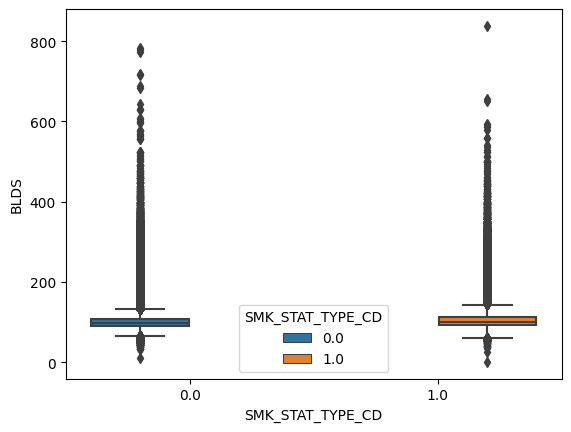

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = ['BLDS', 'WAIST', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD']
diabetes_df = df[diabetes]

sns.boxplot(data=diabetes_df, x='SMK_STAT_TYPE_CD', y='BLDS', hue='SMK_STAT_TYPE_CD')

plt.show()

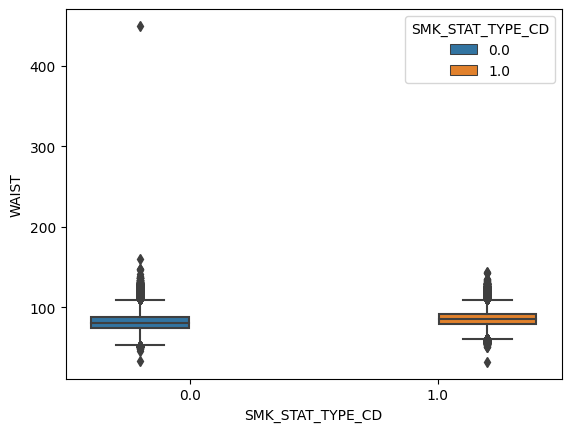

In [7]:
sns.boxplot(data=diabetes_df, x='SMK_STAT_TYPE_CD', y='WAIST', hue='SMK_STAT_TYPE_CD')

plt.show()

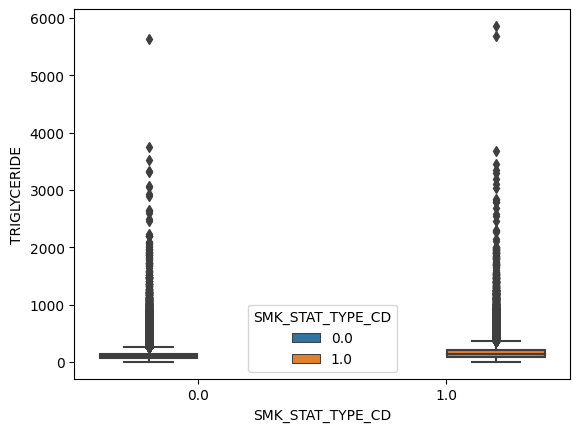

In [8]:
sns.boxplot(data=diabetes_df, x='SMK_STAT_TYPE_CD', y='TRIGLYCERIDE', hue='SMK_STAT_TYPE_CD')

plt.show()

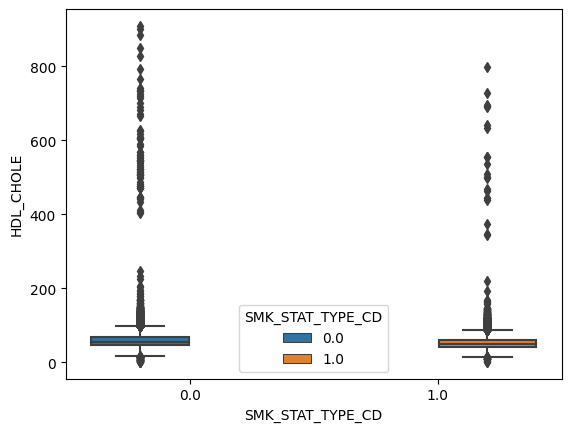

In [9]:
sns.boxplot(data=diabetes_df, x='SMK_STAT_TYPE_CD', y='HDL_CHOLE', hue='SMK_STAT_TYPE_CD')

plt.show()

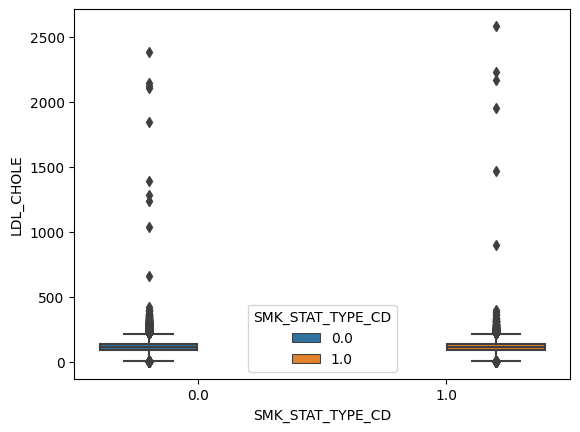

In [10]:
sns.boxplot(data=diabetes_df, x='SMK_STAT_TYPE_CD', y='LDL_CHOLE', hue='SMK_STAT_TYPE_CD')

plt.show()

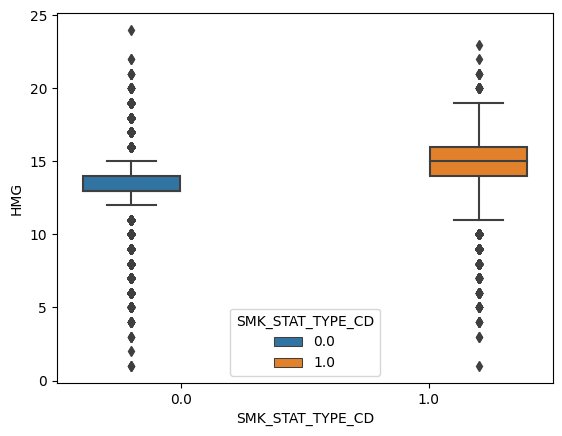

In [12]:
sns.boxplot(data=diabetes_df, x='SMK_STAT_TYPE_CD', y='HMG', hue='SMK_STAT_TYPE_CD')

plt.show()

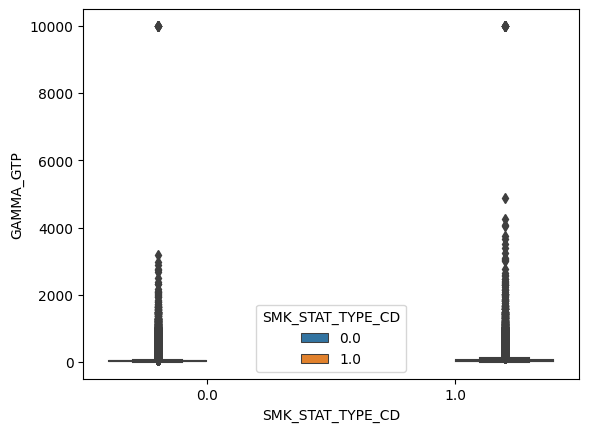

In [11]:
sns.boxplot(data=diabetes_df, x='SMK_STAT_TYPE_CD', y='GAMMA_GTP', hue='SMK_STAT_TYPE_CD')

plt.show()

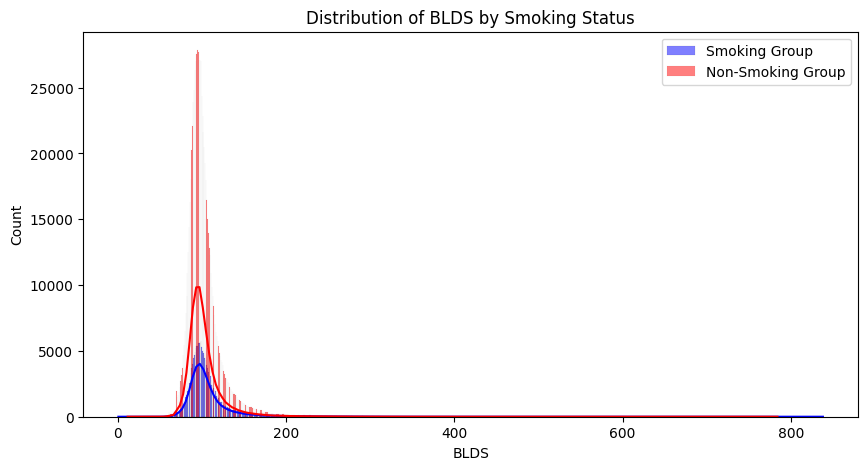

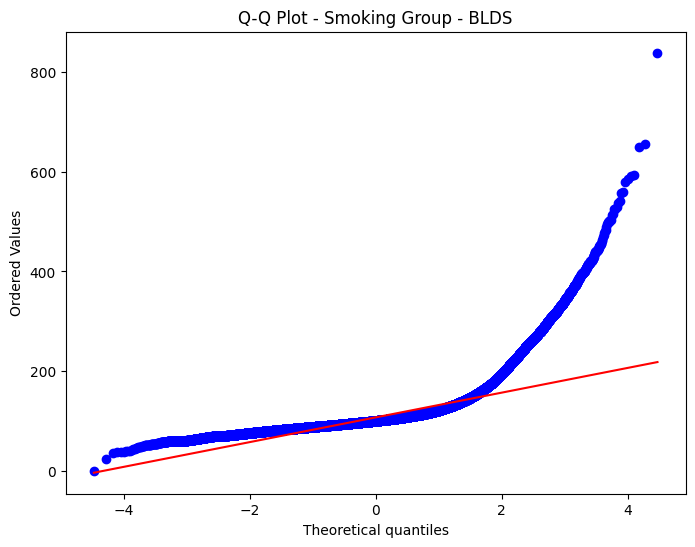

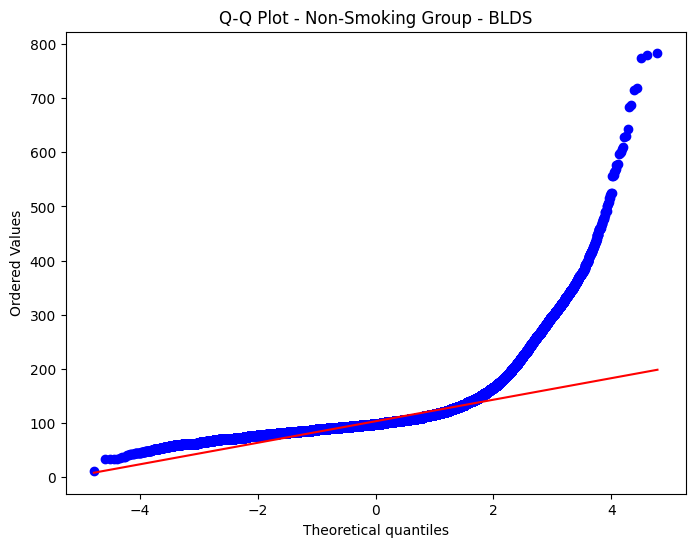

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# BLDS 열을 기준으로 담배를 피우는 그룹과 피우지 않는 그룹의 데이터 추출
smoking_group_blds = df[df['SMK_STAT_TYPE_CD'] == 1]['BLDS'].dropna()
non_smoking_group_blds = df[df['SMK_STAT_TYPE_CD'] == 0]['BLDS'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 5))
sns.histplot(smoking_group_blds, kde=True, color='blue', label='Smoking Group')
sns.histplot(non_smoking_group_blds, kde=True, color='red', label='Non-Smoking Group')
plt.title('Distribution of BLDS by Smoking Status')
plt.xlabel('BLDS')
plt.legend()
plt.show()

# Q-Q plot 그리기
plt.figure(figsize=(8, 6))
stats.probplot(smoking_group_blds, dist="norm", plot=plt)
plt.title('Q-Q Plot - Smoking Group - BLDS')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(non_smoking_group_blds, dist="norm", plot=plt)
plt.title('Q-Q Plot - Non-Smoking Group - BLDS')
plt.show()

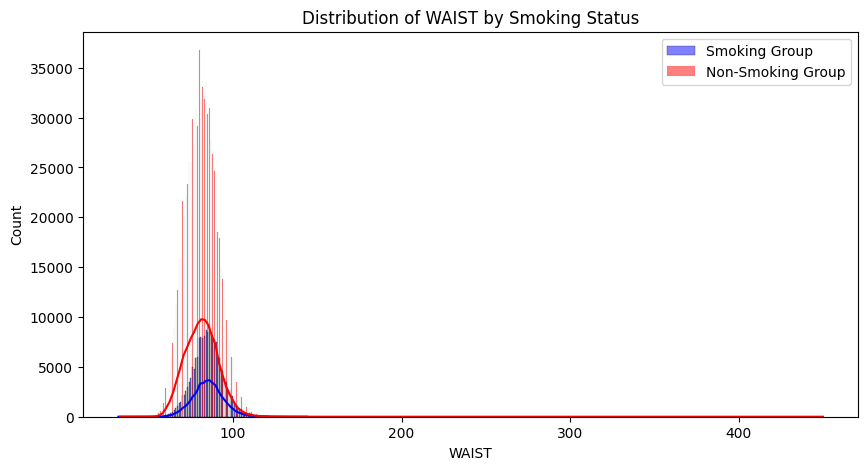

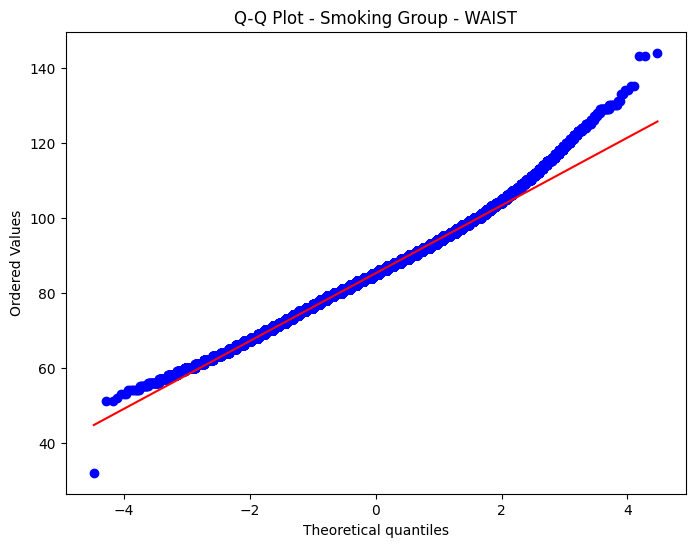

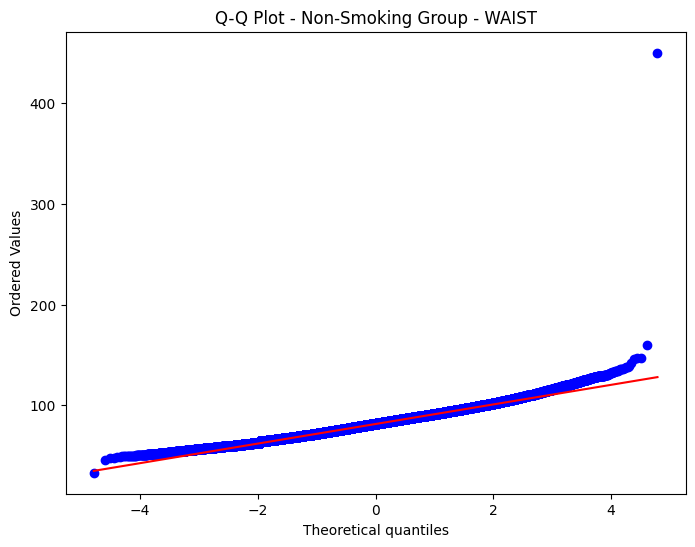

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 분석할 열 리스트
columns_to_analyze = ['BLDS', 'WAIST', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'GAMMA_GTP']

selected_column = 'WAIST'  # 선택한 열

# 담배를 피우는 그룹과 피우지 않는 그룹의 데이터 추출
smoking_group = df[df['SMK_STAT_TYPE_CD'] == 1][selected_column].dropna()
non_smoking_group = df[df['SMK_STAT_TYPE_CD'] == 0][selected_column].dropna()

# 선택된 열에 대한 히스토그램 그리기
plt.figure(figsize=(10, 5))
sns.histplot(smoking_group, kde=True, color='blue', label='Smoking Group')
sns.histplot(non_smoking_group, kde=True, color='red', label='Non-Smoking Group')
plt.title(f'Distribution of {selected_column} by Smoking Status')
plt.xlabel(selected_column)
plt.legend()
plt.show()

# 선택된 열에 대한 Q-Q plot 그리기
plt.figure(figsize=(8, 6))
stats.probplot(smoking_group, dist="norm", plot=plt)
plt.title(f'Q-Q Plot - Smoking Group - {selected_column}')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(non_smoking_group, dist="norm", plot=plt)
plt.title(f'Q-Q Plot - Non-Smoking Group - {selected_column}')
plt.show()

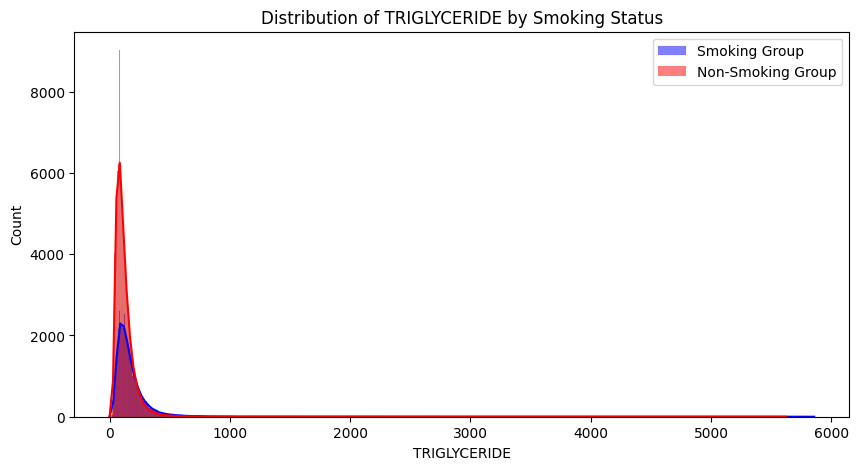

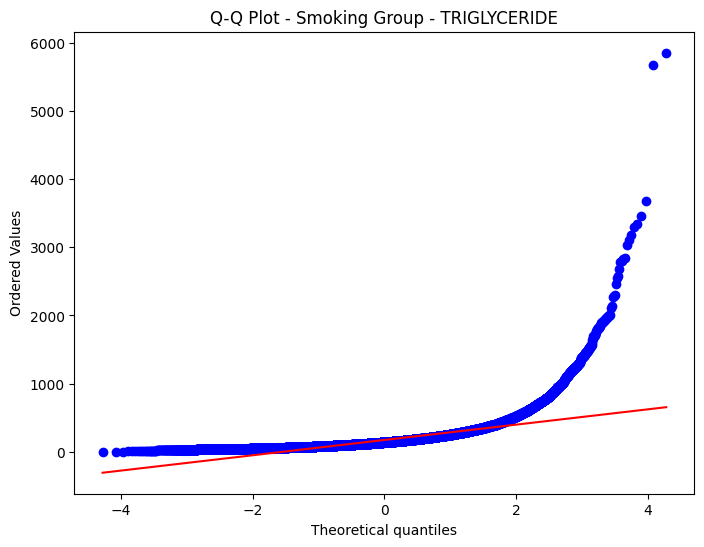

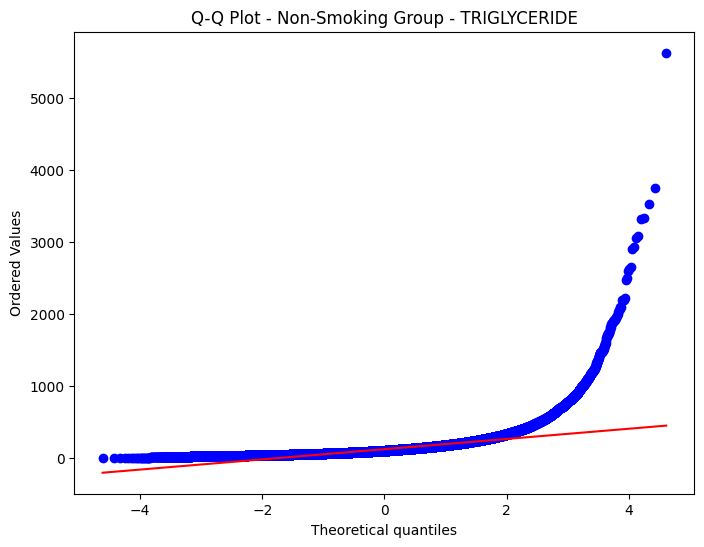

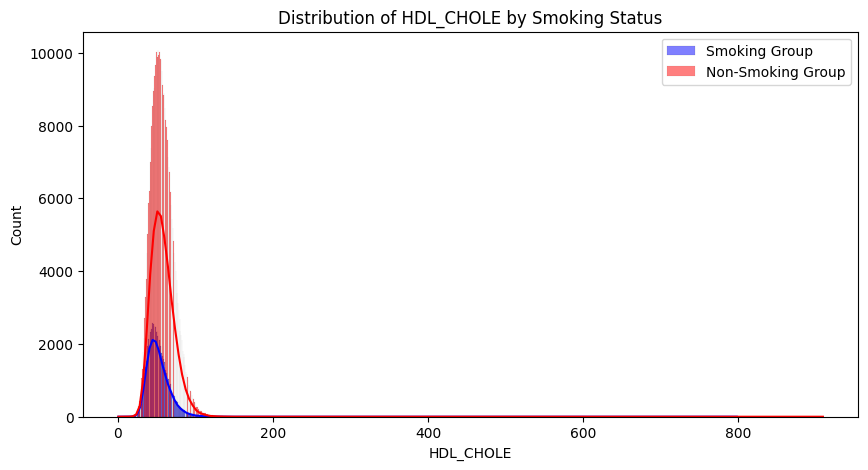

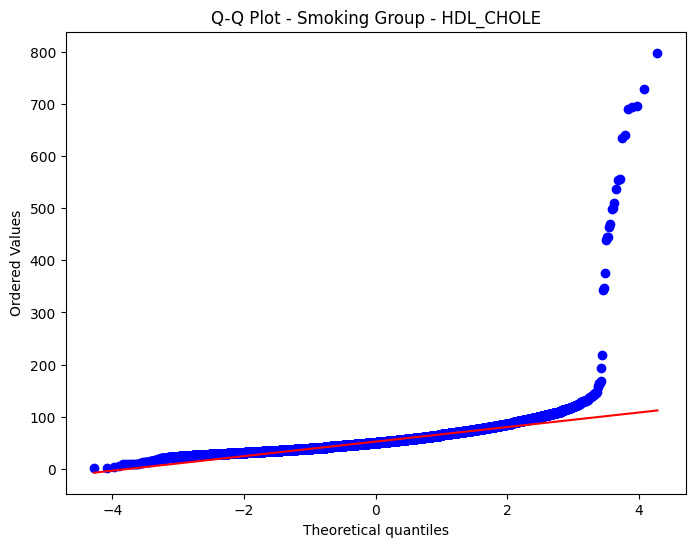

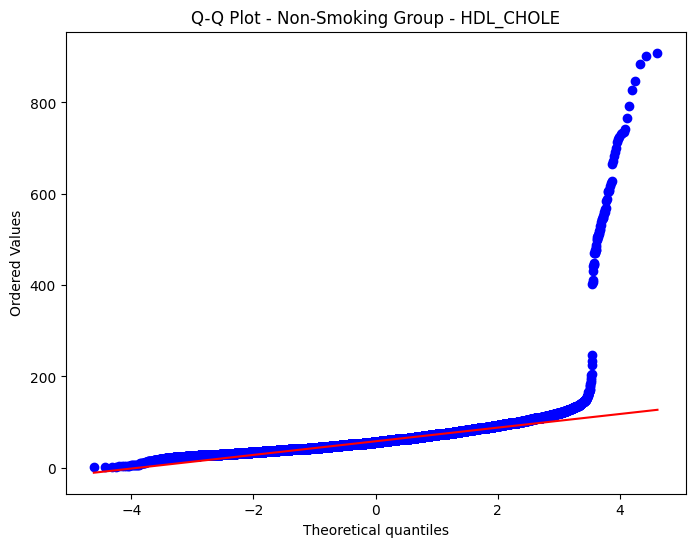

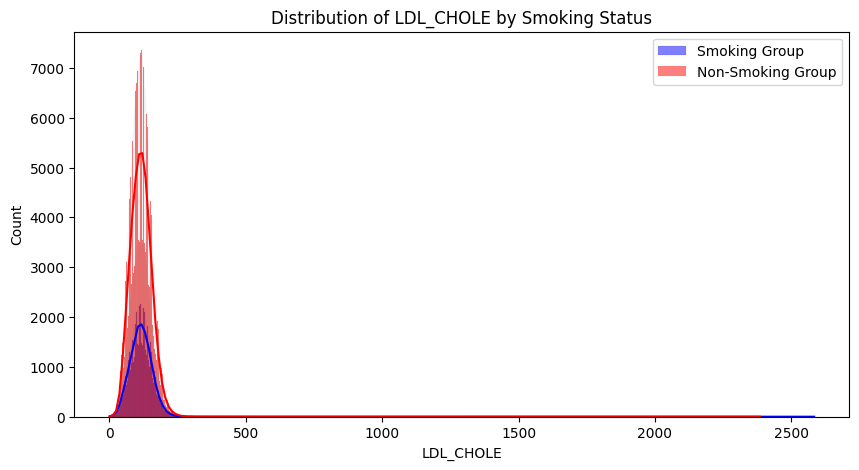

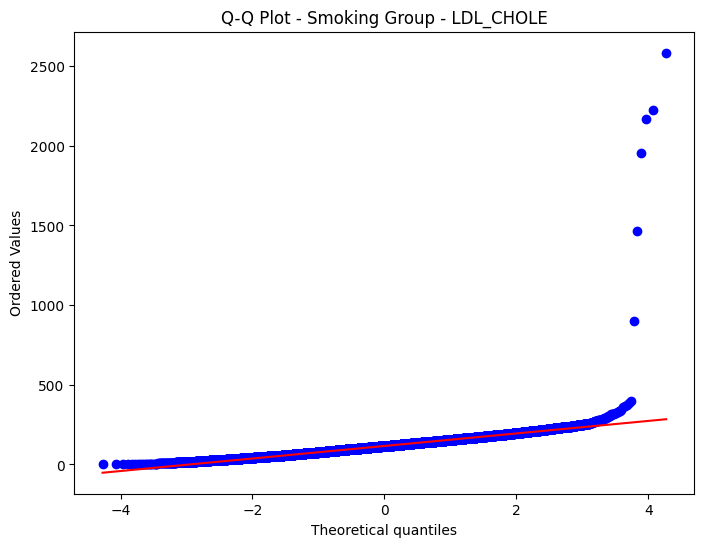

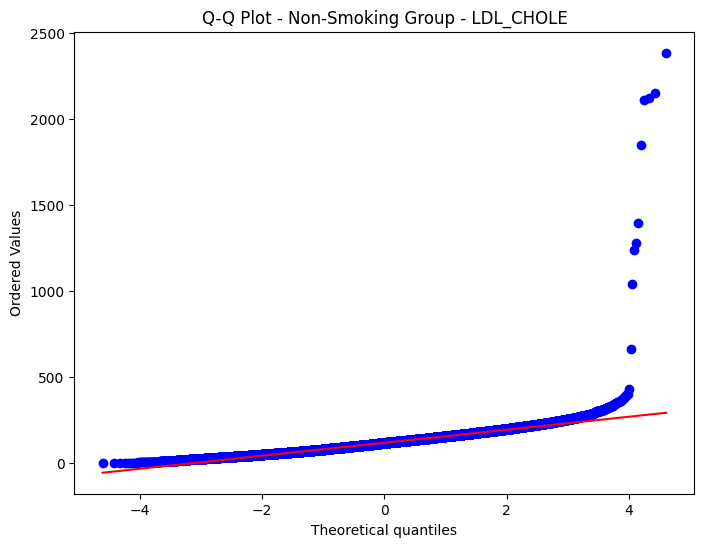

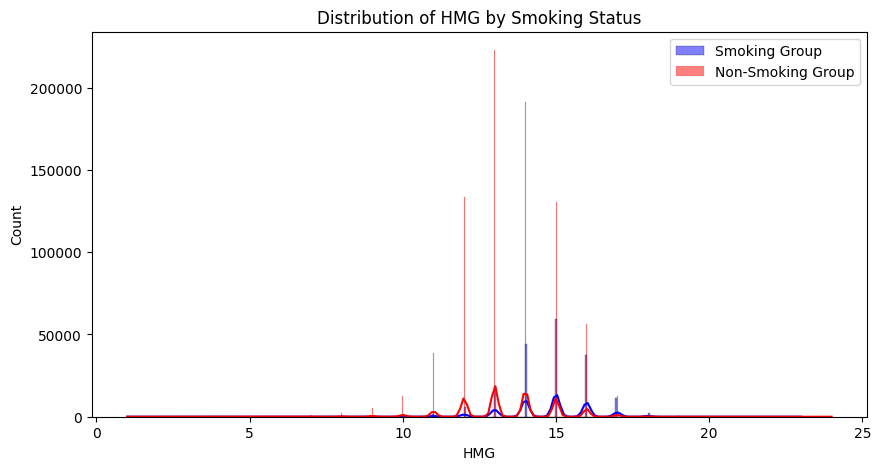

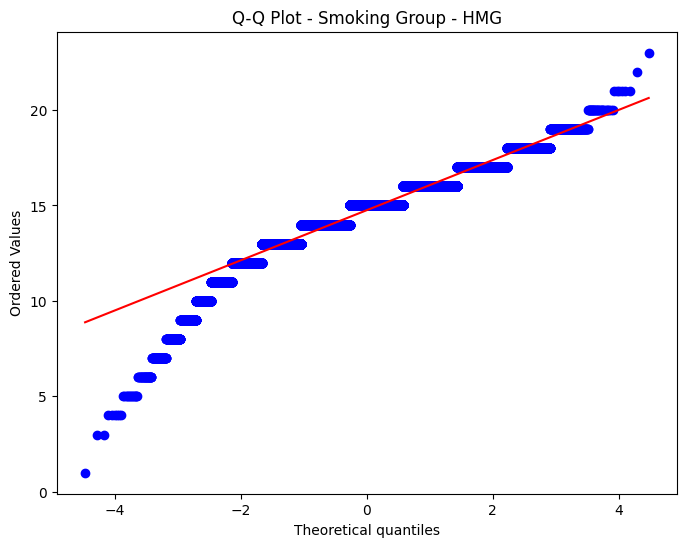

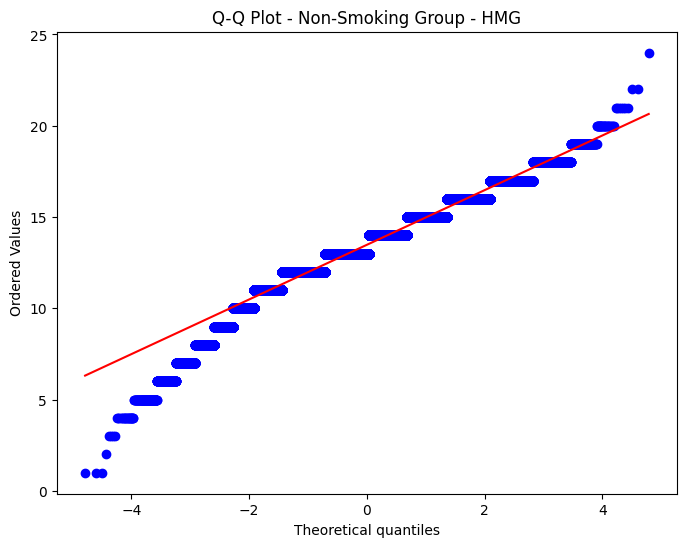

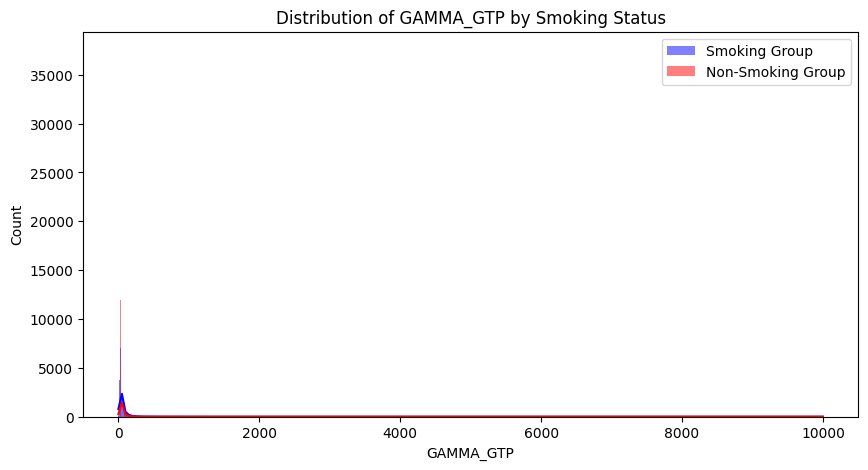

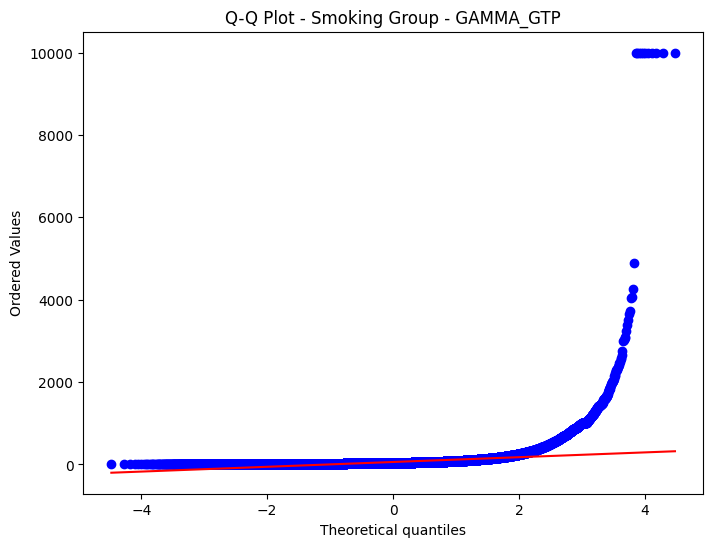

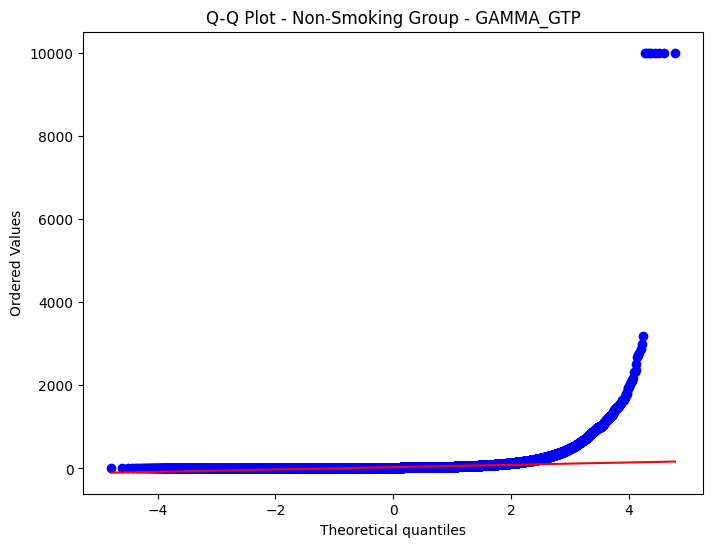

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 분석할 열 리스트
columns_to_analyze = ['TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'GAMMA_GTP']

for column in columns_to_analyze:
    # 각 열을 기준으로 담배를 피우는 그룹과 피우지 않는 그룹의 데이터 추출
    smoking_group_col = df[df['SMK_STAT_TYPE_CD'] == 1][column].dropna()
    non_smoking_group_col = df[df['SMK_STAT_TYPE_CD'] == 0][column].dropna()

    # 히스토그램 그리기
    plt.figure(figsize=(10, 5))
    sns.histplot(smoking_group_col, kde=True, color='blue', label='Smoking Group')
    sns.histplot(non_smoking_group_col, kde=True, color='red', label='Non-Smoking Group')
    plt.title(f'Distribution of {column} by Smoking Status')
    plt.xlabel(column)
    plt.legend()
    plt.show()

    # Q-Q plot 그리기
    plt.figure(figsize=(8, 6))
    stats.probplot(smoking_group_col, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - Smoking Group - {column}')
    plt.show()

    plt.figure(figsize=(8, 6))
    stats.probplot(non_smoking_group_col, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - Non-Smoking Group - {column}')
    plt.show()


In [51]:
from scipy.stats import ttest_ind, shapiro, levene

# 담배를 피우는 그룹과 피우지 않는 그룹의 BLDS 열 값 비교 (샘플 크기를 10000개로 제한)
smoking_group_blds = df[df['SMK_STAT_TYPE_CD'] == 1]['BLDS'].dropna().sample(n=5000, random_state=42)
non_smoking_group_blds = df[df['SMK_STAT_TYPE_CD'] == 0]['BLDS'].dropna().sample(n=5000, random_state=42)

# 등분산성 검정
levene_statistic_blds, levene_p_value_blds = levene(smoking_group_blds, non_smoking_group_blds)

print(f"Levene's Test - BLDS - Statistic: {levene_statistic_blds}, p-value: {levene_p_value_blds}")

# 정규성 검정
shapiro_statistic_smoking_blds, shapiro_p_value_smoking_blds = shapiro(smoking_group_blds)
shapiro_statistic_non_smoking_blds, shapiro_p_value_non_smoking_blds = shapiro(non_smoking_group_blds)

print(f"Shapiro-Wilk Test - Smoking Group - BLDS - Statistic: {shapiro_statistic_smoking_blds}, p-value: {shapiro_p_value_smoking_blds}")
print(f"Shapiro-Wilk Test - Non-Smoking Group - BLDS - Statistic: {shapiro_statistic_non_smoking_blds}, p-value: {shapiro_p_value_non_smoking_blds}")

Levene's Test - BLDS - Statistic: 54.93133264827005, p-value: 1.3492628315209241e-13
Shapiro-Wilk Test - Smoking Group - BLDS - Statistic: 0.7226430177688599, p-value: 0.0
Shapiro-Wilk Test - Non-Smoking Group - BLDS - Statistic: 0.7019765377044678, p-value: 0.0


In [34]:
from scipy.stats import ranksums

# BLDS 열을 기준으로 담배를 피우는 그룹과 피우지 않는 그룹의 샘플 추출
smoking_group_blds = df[df['SMK_STAT_TYPE_CD'] == 1]['BLDS'].dropna().sample(n=5000, random_state=42)
non_smoking_group_blds = df[df['SMK_STAT_TYPE_CD'] == 0]['BLDS'].dropna().sample(n=5000, random_state=42)

# Mann-Whitney U 검정 수행
statistic, p_value = ranksums(smoking_group_blds, non_smoking_group_blds)

# 결과 출력
print(f"Rank Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

Rank Sum Statistic: 9.133689929816896
P-value: 6.620345594650296e-20


In [35]:
smoking_group_waist = df[df['SMK_STAT_TYPE_CD'] == 1]['WAIST'].dropna().sample(n=5000, random_state=42)
non_smoking_group_waist = df[df['SMK_STAT_TYPE_CD'] == 0]['WAIST'].dropna().sample(n=5000, random_state=42)

levene_statistic_waist, levene_p_value_waist = levene(smoking_group_waist, non_smoking_group_waist)

print(f"Levene's Test - WAIST - Statistic: {levene_statistic_waist}, p-value: {levene_p_value_waist}")

shapiro_statistic_smoking_waist, shapiro_p_value_smoking_waist = shapiro(smoking_group_waist)
shapiro_statistic_non_smoking_waist, shapiro_p_value_non_smoking_waist = shapiro(non_smoking_group_waist)

print(f"Shapiro-Wilk Test - Smoking Group - WAIST - Statistic: {shapiro_statistic_smoking_waist}, p-value: {shapiro_p_value_smoking_waist}")
print(f"Shapiro-Wilk Test - Non-Smoking Group - WAIST - Statistic: {shapiro_statistic_non_smoking_waist}, p-value: {shapiro_p_value_non_smoking_waist}")

Levene's Test - WAIST - Statistic: 50.66447116177888, p-value: 1.171177100659436e-12
Shapiro-Wilk Test - Smoking Group - WAIST - Statistic: 0.9941953420639038, p-value: 2.41698019020839e-13
Shapiro-Wilk Test - Non-Smoking Group - WAIST - Statistic: 0.9939815402030945, p-value: 1.1961868399013725e-13


In [36]:
from scipy.stats import ranksums

# WAIST 열을 기준으로 담배를 피우는 그룹과 피우지 않는 그룹의 샘플 추출
smoking_group_waist = df[df['SMK_STAT_TYPE_CD'] == 1]['WAIST'].dropna().sample(n=5000, random_state=42)
non_smoking_group_waist = df[df['SMK_STAT_TYPE_CD'] == 0]['WAIST'].dropna().sample(n=5000, random_state=42)

# Mann-Whitney U 검정 수행
statistic, p_value = ranksums(smoking_group_waist, non_smoking_group_waist)

# 결과 출력
print(f"Rank Sum Statistic: {statistic}")
print(f"P-value: {p_value}")

Rank Sum Statistic: 20.23891975268009
P-value: 4.448120561377351e-91


In [38]:
from scipy.stats import levene, shapiro, ranksums

# 각 열에 대한 샘플 추출
sample_size = 5000  # 샘플 크기
columns_to_test = ['TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'GAMMA_GTP']

for column in columns_to_test:
    # 등분산성 검정
    smoking_group_col = df[df['SMK_STAT_TYPE_CD'] == 1][column].dropna().sample(n=sample_size, random_state=42)
    non_smoking_group_col = df[df['SMK_STAT_TYPE_CD'] == 0][column].dropna().sample(n=sample_size, random_state=42)

    levene_statistic, levene_p_value = levene(smoking_group_col, non_smoking_group_col)
    print(f"Levene's Test - {column} - Statistic: {levene_statistic}, p-value: {levene_p_value}")

    # 정규성 검정 - 담배 피우는 그룹
    shapiro_statistic_smoking, shapiro_p_value_smoking = shapiro(smoking_group_col)
    print(f"Shapiro-Wilk Test - Smoking Group - {column} - Statistic: {shapiro_statistic_smoking}, p-value: {shapiro_p_value_smoking}")

    # 정규성 검정 - 담배 피우지 않는 그룹
    shapiro_statistic_non_smoking, shapiro_p_value_non_smoking = shapiro(non_smoking_group_col)
    print(f"Shapiro-Wilk Test - Non-Smoking Group - {column} - Statistic: {shapiro_statistic_non_smoking}, p-value: {shapiro_p_value_non_smoking}")

    # Mann-Whitney U 검정
    statistic, p_value = ranksums(smoking_group_col, non_smoking_group_col)
    print(f"Rank Sum Statistic - {column}: {statistic}, p-value: {p_value}")
    print()

Levene's Test - TRIGLYCERIDE - Statistic: 172.16573328442064, p-value: 5.225195773189718e-39
Shapiro-Wilk Test - Smoking Group - TRIGLYCERIDE - Statistic: 0.6247225999832153, p-value: 0.0
Shapiro-Wilk Test - Non-Smoking Group - TRIGLYCERIDE - Statistic: 0.6226269006729126, p-value: 0.0
Rank Sum Statistic - TRIGLYCERIDE: 26.372528986723974, p-value: 2.8315654932174836e-153

Levene's Test - HDL_CHOLE - Statistic: 8.563244673904007, p-value: 0.0034378960595479384
Shapiro-Wilk Test - Smoking Group - HDL_CHOLE - Statistic: 0.5992172956466675, p-value: 0.0
Shapiro-Wilk Test - Non-Smoking Group - HDL_CHOLE - Statistic: 0.5189670324325562, p-value: 0.0
Rank Sum Statistic - HDL_CHOLE: -20.82810626601288, p-value: 2.407952743389496e-96

Levene's Test - LDL_CHOLE - Statistic: 2.497314686874078, p-value: 0.11407223254136444
Shapiro-Wilk Test - Smoking Group - LDL_CHOLE - Statistic: 0.9455413222312927, p-value: 1.558581605259099e-39
Shapiro-Wilk Test - Non-Smoking Group - LDL_CHOLE - Statistic: 0.9